In [1]:
# Importar las librerias a utilizar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo en memoria el dataset a utilizar
dataset__route = "data/dart2.csv"
dataset_df = pd.read_csv(dataset__route)

# 5 primeros registros del dataset
dataset_df.head()

,x,y,color
0,279.925028,310.327844,3
1,402.967849,84.953838,3
2,432.899756,241.304197,3
3,355.766547,72.821111,3
4,320.429621,240.766330,1


In [3]:
# Normalizo los valores de las variables x e y del dataset de puntos
## Instancio un objeto de la clase MinMaxScaler
scaler= MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.46944218, 0.90177655],
       [0.86688454, 0.13616954],
       [0.96356802, 0.6672997 ],
       ...,
       [0.57251241, 0.53190733],
       [0.51864617, 0.7731572 ],
       [0.44753532, 0.39507694]])

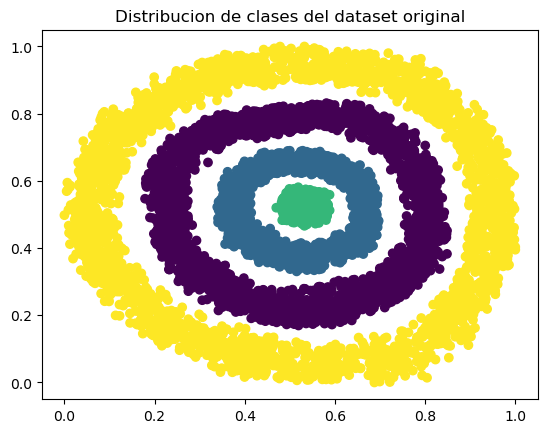

In [4]:
# Represento el dataset de puntos en un eje bidimensional
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'])
plt.title("Distribucion de clases del dataset original")
plt.show()

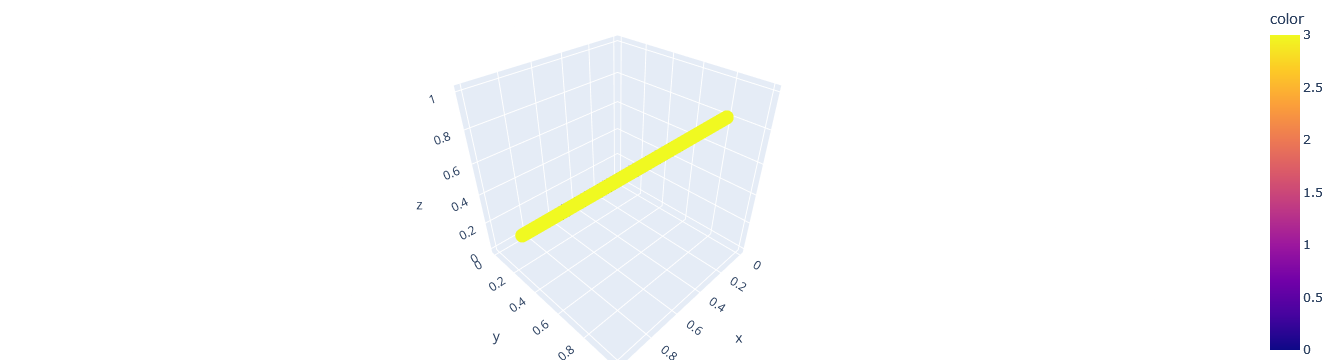

In [10]:
# Represento el dataset en un eje tridimensional
fig = px.scatter_3d(X, X[:, 0], X[:, 1], X[:, 1], color = dataset_df['color'])
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [57]:
# Instancio un modelo de la clase DBSCAN
from sklearn.cluster import DBSCAN

eps = 0.033
model = DBSCAN(eps = eps)

# Entreno el modelo
model.fit(X)

DBSCAN(eps=0.033)

In [58]:
# Etiquetas asignadas por el modelo a cada punto
labels = model.labels_
labels

array([0, 0, 0, ..., 3, 2, 1], dtype=int64)

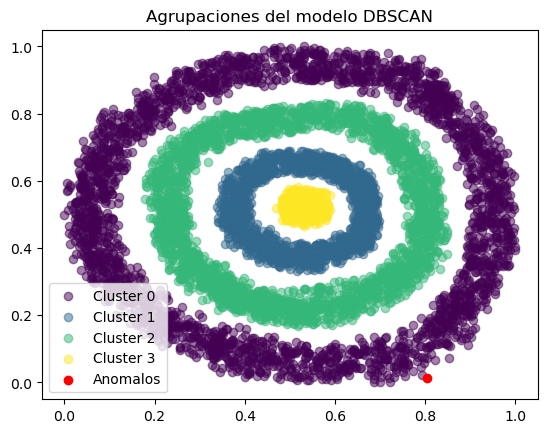

In [59]:
# Represento las agrupaciones del modelo DBSCAN en un eje bidimensional
plt.figure()

valid_labels = set([label for label in labels if label != -1])
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(valid_labels)))

for _ in range(len(valid_labels)):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]], alpha = 0.5, label = f'Cluster {_}')
    
# Represento los puntos considerados anomalos por el modelo
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c = "red", label = 'Anomalos')
plt.title("Agrupaciones del modelo DBSCAN")
plt.legend()
plt.show()